## Covid 19 Case Data - United States (CA & IN focus)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import csv
import gmaps
from us import states
import numpy as np
import requests
from config import gkey
from config import rapid_api_key
from config import rapidapi_host
from pprint import pprint
import datetime as dt
import time

pd.options.display.max_rows = 40
pd.options.display.max_rows

40

In [2]:
#Import files to use with API's
county_path = 'Resources/us_counties_states_filtered.csv'
date_path = 'Resources/dates.csv'

In [3]:
us_counties_df = pd.read_csv(county_path)
date_df = pd.read_csv(date_path)

In [4]:
# mask1 = date_df['Date']<'2020-10-15'
# date_df=date_df[mask1]
# date_df.sort_values(by = 'Date', ascending=True, inplace = True)
# date_df

### API Calls to Pull Coronavirus Data by County

In [5]:
county_list = []
state_list = []
# map1 = us_counties_df['State']=='Nevada'
county_list = us_counties_df['County, State'].tolist()
date_list = date_df['Date'].tolist()
date_list = ['2021-03-04','2021-03-05','2021-03-06','2021-03-07']

# date_list = []
# rundate = dt.date.today() - dt.timedelta(days=1)
# rundate = f'{rundate.year}-{rundate.month}-{rundate.day}'
# date_list.append(rundate)
date_list

['2021-03-04', '2021-03-05', '2021-03-06', '2021-03-07']

In [6]:
# state='Texas'
# county='Dickens'
# date_val = '2020-11-09'
# country_state = "US " + state
# #  "city_name":county,

# url = "https://covid-19-statistics.p.rapidapi.com/reports"
# headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}
# querystring = {"region_province":state,"iso":"USA","region_name":"US", "city_name":county, \
#                            "date":date_val,"q":country_state}   

# response = requests.request("GET", url, headers=headers, params=querystring).json()

# pprint(response)

In [7]:
# # Run API to collect county level data
url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

# Map County Lists
map_county_state_list = []
map_new_county_list = []
map_tot_county_cases = []
map_new_county_cases = []
map_tot_county_deaths = []
map_new_county_deaths = []
map_county_date = []
map_county_lat = []
map_county_lng = []

# County Lists
county_state_list = []
new_county_list = []
tot_county_cases = []
new_county_cases = []
tot_county_deaths = []
new_county_deaths = []
county_date = []
county_lat = []
county_lng = []

record_counter = 0
set_counter = 1

for date_val in date_list:    
    try:        
#         set_counter += 1

        for name in county_list:
            value = name.split(',')
            county = value[0]
            state = value[1]
            country_state = "US " + state
            record_counter +=1

            querystring = {"region_province":state,"iso":"USA","region_name":"US","city_name":county, \
                           "date":date_val,"q":country_state}   

            response = requests.request("GET", url, headers=headers, params=querystring).json()    
            
#             time.sleep(1)
            
            try:
                # Add Map information
                map_county_state_list.append(response['data'][0]['region']['province'])
                map_new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                map_tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                map_new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                map_tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                map_new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                map_county_date.append(response['data'][0]['region']['cities'][0]['date'])
                map_county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                map_county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                # Add County information
                county_state_list.append(response['data'][0]['region']['province'])
                new_county_list.append(response['data'][0]['region']['cities'][0]['name'])
                tot_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed'])
                new_county_cases.append(response['data'][0]['region']['cities'][0]['confirmed_diff'])
                tot_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths'])
                new_county_deaths.append(response['data'][0]['region']['cities'][0]['deaths_diff'])
                county_date.append(response['data'][0]['region']['cities'][0]['date'])
                county_lat.append(response['data'][0]['region']['cities'][0]['lat'])
                county_lng.append(response['data'][0]['region']['cities'][0]['long'])

                if record_counter > len(county_list):
                    record_counter = 1
                    set_counter += 1

                print(f'Processing record {record_counter} of set {set_counter} | {county}, {state}, {date_val}.')

            except:
                record_counter -= 1
                print(f'Error: County: {county} and State:{state} not found for: {date_val}')

#         set_counter += 1
        
    except:
        
        print(f'Date Error: {date_val} was not processed for {county},{state}')
        
            
print(f'---------------------------------Process Completed----------------------------------------')


Processing record 1 of set 1 | Los Angeles, California, 2021-03-04.
Processing record 2 of set 1 | Ventura, California, 2021-03-04.
Processing record 3 of set 1 | Fulton, Indiana, 2021-03-04.
Processing record 1 of set 2 | Los Angeles, California, 2021-03-05.
Processing record 2 of set 2 | Ventura, California, 2021-03-05.
Processing record 3 of set 2 | Fulton, Indiana, 2021-03-05.
Processing record 1 of set 3 | Los Angeles, California, 2021-03-06.
Processing record 2 of set 3 | Ventura, California, 2021-03-06.
Processing record 3 of set 3 | Fulton, Indiana, 2021-03-06.
Error: County: Los Angeles and State:California not found for: 2021-03-07
Error: County: Ventura and State:California not found for: 2021-03-07
Error: County: Fulton and State:Indiana not found for: 2021-03-07
---------------------------------Process Completed----------------------------------------


In [8]:
# Create dataframe for county level map data
map_covid_county_new_df = pd.DataFrame({
    "State" : map_county_state_list,
    "County" : map_new_county_list,
    "Total Cases" : map_tot_county_cases,
    "New Cases" : map_new_county_cases,
    "Total Deaths" : map_tot_county_deaths,
    "New Deaths" : map_new_county_deaths,
    "Date" : map_county_date,
    "Latitude" : map_county_lat,
    "Longitude" : map_county_lng   
})

map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='w', index=False, header=True)
# map_covid_county_new_df.to_csv('Resources/map_covid_county_df.csv', mode='a', index=False, header=False)

In [9]:
# Create dataframe for county level data
covid_county_new_df = pd.DataFrame({
    "State" : county_state_list,
    "County" : new_county_list,
    "Total Cases" : tot_county_cases,
    "New Cases" : new_county_cases,
    "Total Deaths" : tot_county_deaths,
    "New Deaths" : new_county_deaths,
    "Date" : county_date,
    "Latitude" : county_lat,
    "Longitude" : county_lng   
})

covid_county_new_df.to_csv('Resources/covid_county_df.csv', mode='a', index=False, header=False)

### API Calls to Pull Coronavirus Data by State

In [10]:
# Use this API call to get the state information without the county level detail
us_state_df = pd.read_csv('Resources/us_counties_states.csv')

state_list = []

s_list = us_state_df['State'].tolist()

for item in s_list:
    if item not in state_list:
        state_list.append(item)

# State lists
new_state = []
total_cases_state = []
new_cases_state = []
tot_deaths_state = []
new_deaths_state = []
fatality_rate_state = []
date_state = []
lat_state = []
long_state = []

url = "https://covid-19-statistics.p.rapidapi.com/reports"
headers = {'x-rapidapi-host': rapidapi_host,'x-rapidapi-key': rapid_api_key}

state_record_counter = 0
state_set_counter = 0

for date_val in date_list:
    
    try:    
        state_set_counter += 1
    
        for state in state_list:
            
            state_record_counter +=1
            
            try:                
                querystring = {"iso":"USA", "region_province":state, "date":date_val}                
                response = requests.request("GET", url, headers=headers, params=querystring).json()

                new_state.append(response['data'][0]['region']['province'])
                lat_state.append(response['data'][0]['region']['lat'])
                long_state.append(response['data'][0]['region']['long'])
                total_cases_state.append(response['data'][0]['confirmed'])
                new_cases_state.append(response['data'][0]['confirmed_diff'])
                tot_deaths_state.append(response['data'][0]['deaths'])
                new_deaths_state.append(response['data'][0]['deaths_diff'])
                fatality_rate_state.append(response['data'][0]['fatality_rate'])
                date_state.append(response['data'][0]['date']) 
                
                if state_record_counter > len(state_list):
                    state_record_counter = 1
#                     state_set_counter += 1
                    
                print(f'Processing record {state_record_counter} for set {state_set_counter} | {state} - {date_val}')
                
            except:
                state_record_counter -= 1
                print(f'State error: {state} not found for {date_val}')
            
    except:        
        print(f'Date error: {state} is not found for {date_val}')
              
print(f'---------------------------------Process Completed----------------------------------------')

Processing record 1 for set 1 | Alabama - 2021-03-04
Processing record 2 for set 1 | Alaska - 2021-03-04
Processing record 3 for set 1 | Arizona - 2021-03-04
Processing record 4 for set 1 | Arkansas - 2021-03-04
Processing record 5 for set 1 | California - 2021-03-04
Processing record 6 for set 1 | Colorado - 2021-03-04
Processing record 7 for set 1 | Connecticut - 2021-03-04
Processing record 8 for set 1 | Delaware - 2021-03-04
Processing record 9 for set 1 | District of Columbia - 2021-03-04
Processing record 10 for set 1 | Florida - 2021-03-04
Processing record 11 for set 1 | Georgia - 2021-03-04
Processing record 12 for set 1 | Hawaii - 2021-03-04
Processing record 13 for set 1 | Idaho - 2021-03-04
Processing record 14 for set 1 | Illinois - 2021-03-04
Processing record 15 for set 1 | Indiana - 2021-03-04
Processing record 16 for set 1 | Iowa - 2021-03-04
Processing record 17 for set 1 | Kansas - 2021-03-04
Processing record 18 for set 1 | Kentucky - 2021-03-04
Processing record 19

Processing record 47 for set 3 | Virginia - 2021-03-06
Processing record 48 for set 3 | Washington - 2021-03-06
Processing record 49 for set 3 | West Virginia - 2021-03-06
Processing record 50 for set 3 | Wisconsin - 2021-03-06
Processing record 51 for set 3 | Wyoming - 2021-03-06
State error: Alabama not found for 2021-03-07
State error: Alaska not found for 2021-03-07
State error: Arizona not found for 2021-03-07
State error: Arkansas not found for 2021-03-07
State error: California not found for 2021-03-07
State error: Colorado not found for 2021-03-07
State error: Connecticut not found for 2021-03-07
State error: Delaware not found for 2021-03-07
State error: District of Columbia not found for 2021-03-07
State error: Florida not found for 2021-03-07
State error: Georgia not found for 2021-03-07
State error: Hawaii not found for 2021-03-07
State error: Idaho not found for 2021-03-07
State error: Illinois not found for 2021-03-07
State error: Indiana not found for 2021-03-07
State er

In [11]:
# Create dataframe based on state data
covid_state_new_df = pd.DataFrame({
    "State" : new_state,
    "Total Cases" : total_cases_state,
    "New Cases" : new_cases_state,
    "Total Deaths" : tot_deaths_state,
    "New Deaths" : new_deaths_state,
    "Fatality Rate" : fatality_rate_state,
    "Latitude" : lat_state,
    "Longitude" : long_state,
    "Date" : date_state    
})    

covid_state_new_df.to_csv('Resources/covid_state_df.csv', mode='a', index=False, header=False )

In [12]:
# Import data from .csv files and create dataframes for state and county
state_data_path = 'Resources/covid_state_df.csv'
county_data_path = 'Resources/covid_county_df.csv'
map_county_data_path = 'Resources/map_covid_county_df.csv'

# Create dataframes based on csv file values generated via API calls
covid_state_df = pd.read_csv(state_data_path, index_col='State')
covid_county_df = pd.read_csv(county_data_path, index_col='State')
state_plots_df = pd.read_csv(state_data_path, index_col='Date')
map_county_df = pd.read_csv(map_county_data_path, index_col = 'State')

## Total Coronavirus Case Trend in the United States

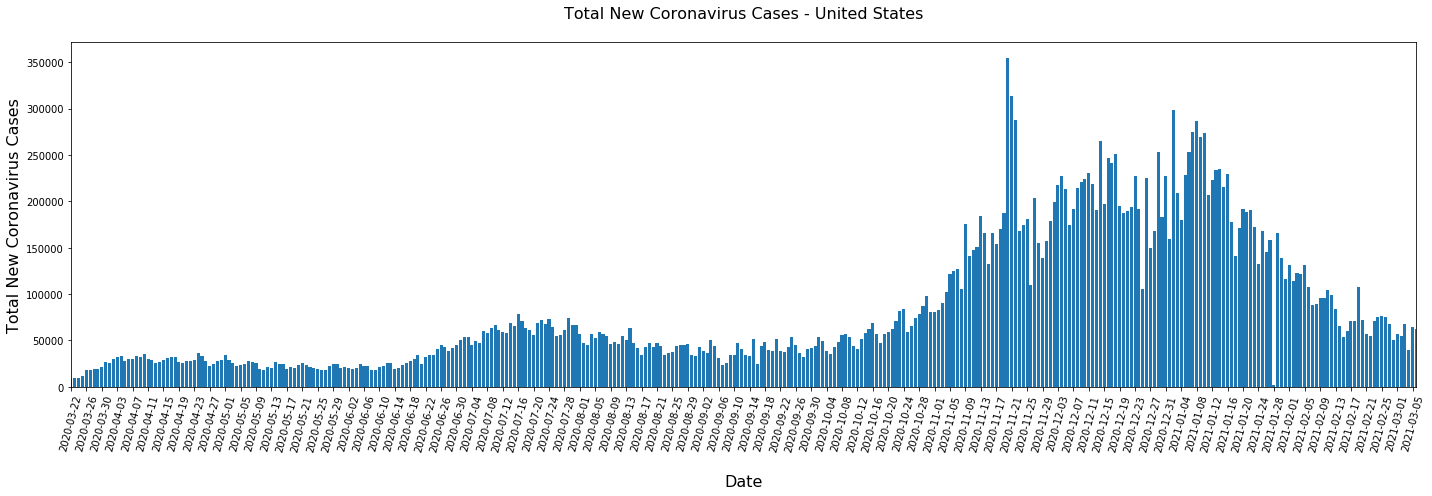

In [13]:
# Create a dataframe to show the trend of total US coronavirus cases by date
tot_us_cases_trend_df = covid_state_df.reset_index().set_index('Date')
tot_cases_gb = tot_us_cases_trend_df.groupby('Date')
tot_us_cases_trend_df = tot_cases_gb[['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths']].sum()
#Export dataframe to .csv file
tot_us_cases_trend_df.to_csv('Resources/tot_us_cases_trend_df.csv')

# Plot the new cases US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Cases'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Cases - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Cases', fontsize=16)
plt.tight_layout()

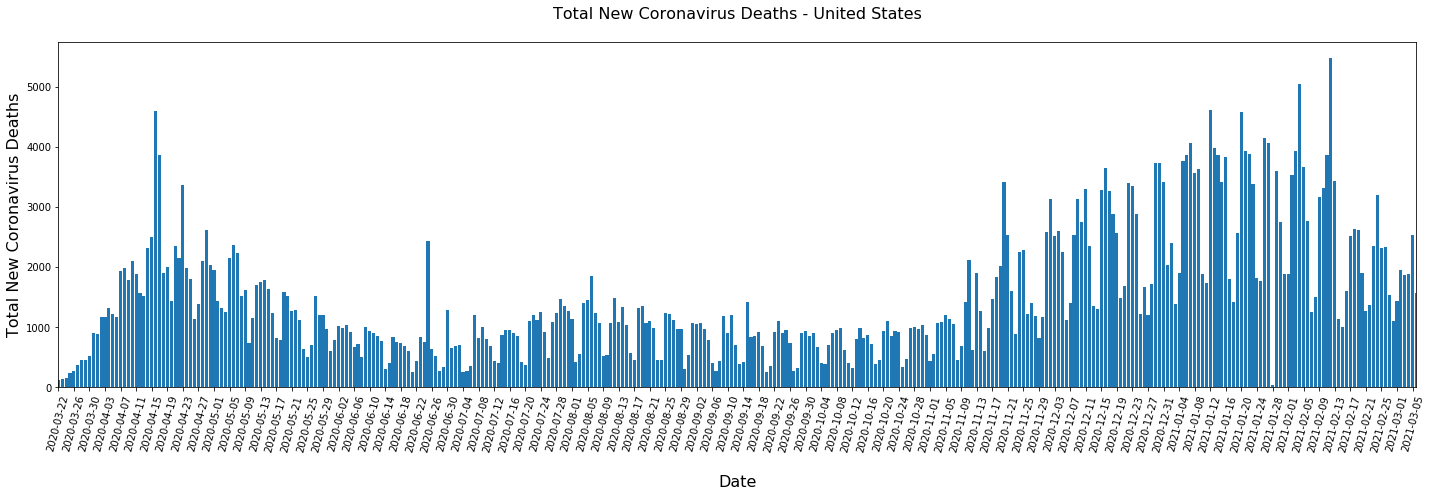

In [14]:
# Plot the new deaths US data as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(tot_us_cases_trend_df.index.values, tot_us_cases_trend_df['New Deaths'])
max_date = tot_us_cases_trend_df.index.max()
ax.set_xlim(['2020-03-22',max_date])

# Set the x axis labels to show every 4th day
ax.set_xticks(ax.get_xticks()[::4])
plt.xticks(rotation=75)

# Set the plot titles and labels
# plt.grid(True)
plt.title('Total New Coronavirus Deaths - United States\n', fontsize=16)
plt.xlabel('\nDate', fontsize=16)
plt.ylabel('Total New Coronavirus Deaths', fontsize=16)
plt.tight_layout()

### Total New Cases and New Deaths in The United States

In [15]:
state_group = covid_state_df.groupby('State')
covid_state_df=covid_state_df.sort_values(by='Date', ascending=False)
last_state_date_df = state_group.last()

# Show the total cases in the US
total_us_cases = last_state_date_df['Total Cases'].sum()
new_us_cases = last_state_date_df['New Cases'].sum()
total_us_deaths = last_state_date_df['Total Deaths'].sum()
new_us_deaths = last_state_date_df['New Deaths'].sum()
date = last_state_date_df['Date'].max()

print(f'Coronavirus stats for The United States as of: {date}')
print("\n"f'Total US Cases: {total_us_cases:,}')
print(f'Total New US Cases: {new_us_cases:,}')
print(f'Total US Deaths: {total_us_deaths:,}')
print(f'Total New US Deaths: {new_us_deaths:,}')

Coronavirus stats for The United States as of: 2021-03-06

Total US Cases: 28,840,051
Total New US Cases: 61,841
Total US Deaths: 522,097
Total New US Deaths: 1,555


### Seven Day Average of New Cases and New Deaths in The United States

In [16]:
us_avg = covid_state_df.reset_index()[['Date', 'New Cases', 'New Deaths']]
us_avg = us_avg.sort_values('Date', ascending=False)
us_avg_gb = us_avg.groupby('Date')
us_avg = us_avg_gb[['Date', 'New Cases', 'New Deaths']].sum()
us_avg = us_avg.sort_index(ascending=False)
us_avg = us_avg.reset_index().head(7)
date = us_avg['Date'].max()

us_avg_new_cases = round(us_avg['New Cases'].mean(),0)
us_avg_new_deaths = round(us_avg['New Deaths'].mean(),0)
print(f'7 Day average as of {date}:\n')
print(f'The seven day average for New Cases in the United States: {us_avg_new_cases:,}')
print(f'The seven day average for New Deaths in the United States: {us_avg_new_deaths:,}')

7 Day average as of 2021-03-06:

The seven day average for New Cases in the United States: 56,615.0
The seven day average for New Deaths in the United States: 1,756.0


### Top 10 States With the Most New Coronavirus Cases

In [17]:
# Show the top 5 states having the most coronavirus cases
last_state_date_df.sort_values(by=['Date', 'New Cases'], ascending=[False,False], inplace=True)
last_state_date_df.head(10)

,Total Cases,New Cases,Total Deaths,New Deaths,Fatality Rate,Latitude,Longitude,Date
State,,,,,,,,
New York,1686993,8126,48247,94,0.0286,42.1657,-74.9481,2021-03-06
California,3595945,4725,54091,308,0.0150,36.1162,-119.6816,2021-03-06
Florida,1940897,4690,31620,98,0.0163,27.7663,-81.6868,2021-03-06
New Jersey,810090,3720,23557,36,0.0291,40.2989,-74.5210,2021-03-06
Texas,2692691,3716,45249,202,0.0168,31.0545,-97.5635,2021-03-06
Massachusetts,589931,3621,16374,78,0.0278,42.2302,-71.5301,2021-03-06
Illinois,1197187,2558,23003,56,0.0192,40.3495,-88.9861,2021-03-06
Pennsylvania,949127,2393,24306,51,0.0256,40.5908,-77.2098,2021-03-06
Georgia,1021778,2269,17905,90,0.0175,33.0406,-83.6431,2021-03-06


### Total Cases by County Heatmap

In [18]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [19]:
# Store Lat and lng into locations
locations = map_county_df[['Latitude', "Longitude"]].astype(float)
total_cases=map_county_df['Total Cases'].astype(float)

In [20]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=total_cases,
                                 dissipating=False, max_intensity=.85,
                                 point_radius=3)                           
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### Total Coronavirus cases in California

In [21]:
cal_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = cal_plots_df['State']=='California'
mask2 = cal_plots_df['State'] == 'Indiana'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

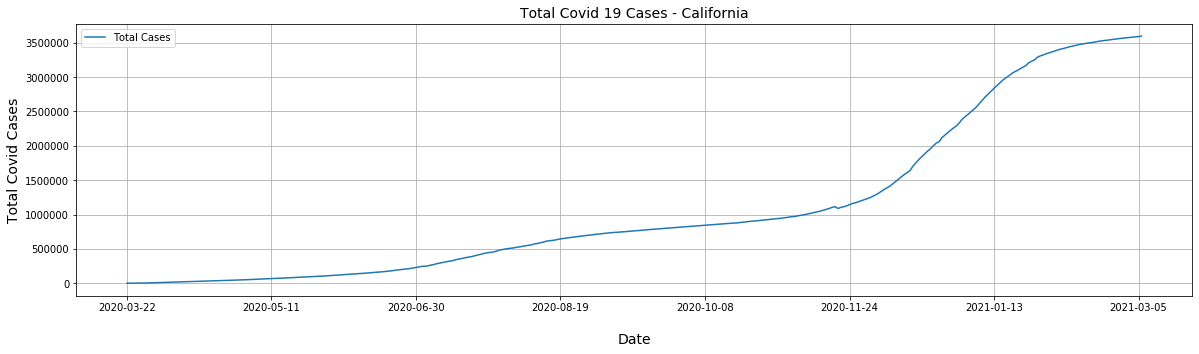

In [22]:
cal_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

plt.title("Total Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [23]:
tot_cases_today = last_state_date_df.loc['California']['Total Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2021-03-06: 3,595,945


### Plot New Coronavirus cases in California

In [24]:
cal_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

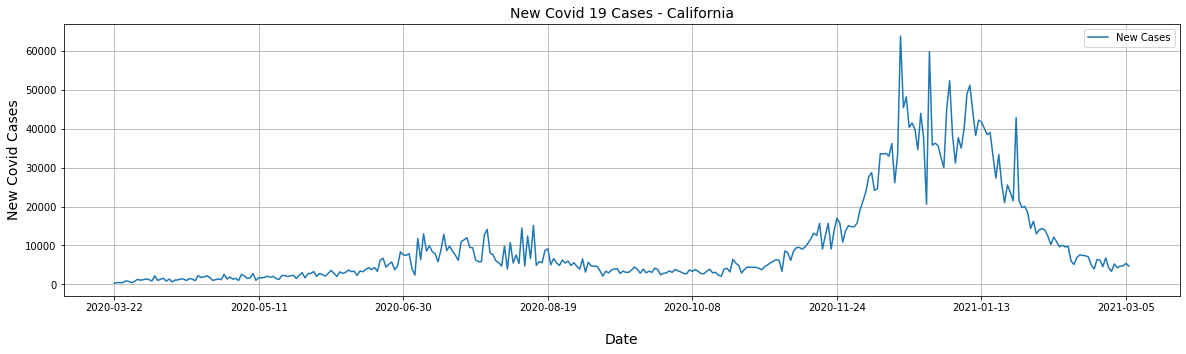

In [25]:
cal_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [26]:
new_cases_today = last_state_date_df.loc['California']['New Cases']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2021-03-06: 4,725


### Plot Total Coronavirus Deaths in California

In [27]:
cal_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

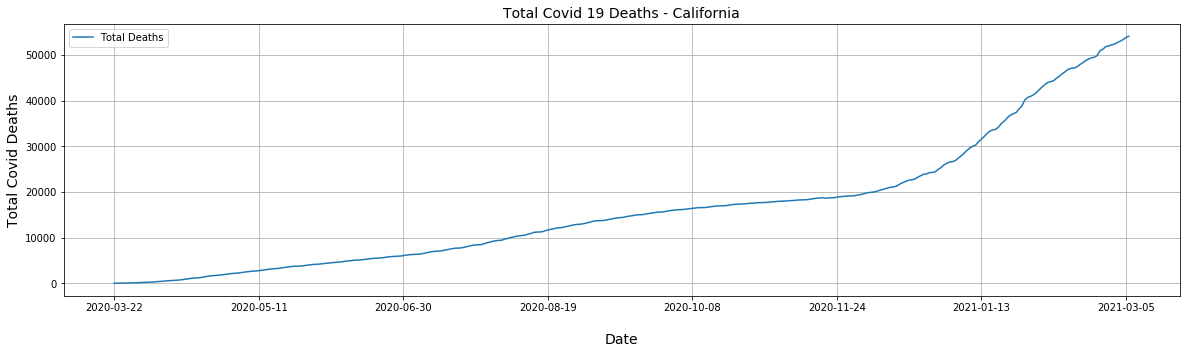

In [28]:
cal_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [29]:
tot_deaths = last_state_date_df.loc['California']['Total Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2021-03-06: 54,091


### Plot New Coronavirus Deaths in California

In [30]:
cal_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = cal_plots_df['State']=='California'

cal_plots_df = cal_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

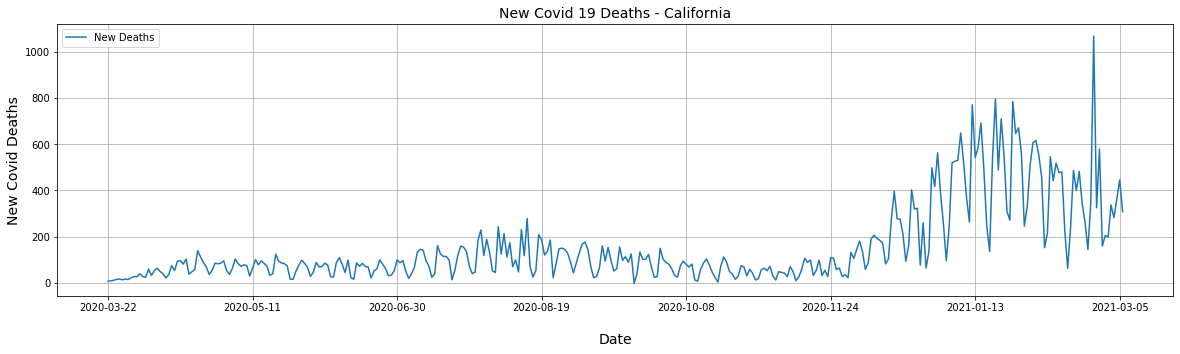

In [31]:
cal_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - California", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [32]:
new_deaths = last_state_date_df.loc['California']['New Deaths']
date = last_state_date_df.loc['California']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2021-03-06: 308


### Seven Day Average of New Cases and New Deaths in California

In [33]:
my_idx = covid_state_df.index.name
avg_sev_ca_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_ca_df = avg_sev_ca_df.loc['California'].head(7)
ca_date = avg_seven_ca_df['Date'].max()

avg_seven_ca_df = avg_seven_ca_df[['New Cases', 'New Deaths']].mean()
avg_seven_ca_df = pd.DataFrame(avg_seven_ca_df)

new_cases_avg = round(avg_seven_ca_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_ca_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {ca_date}\n')
print(f'The 7 day daily average of New Cases in CA is {new_cases_avg:,}')
print(f'The 7 day daily average of New Deaths in CA is {new_deaths_avg:,}')

7 day avg as of: 2021-03-06

The 7 day daily average of New Cases in CA is 4,624.0
The 7 day daily average of New Deaths in CA is 305.0


### Total Coronavirus Cases - Los Angeles County, CA

In [34]:
# Create a dataframe based on county information
# covid_county_df.sort_values(by='Date', ascending=False, inplace=True)
# county_group = covid_county_df.groupby(['State', 'County'])
# covid_county_last_df = county_group.first()
# covid_county_last_df.sort_values(by=['State', 'New Cases'], ascending=[False, False], inplace=True)

# # Show the total coronavirus cases by county in California
# california_cases_by_county_df = covid_county_last_df.loc['California']
# california_cases_by_county_df

### Plot Total Coronavirus Cases in Los Angeles County, CA

Text(0, 0.5, 'Total Coronavirus Cases')

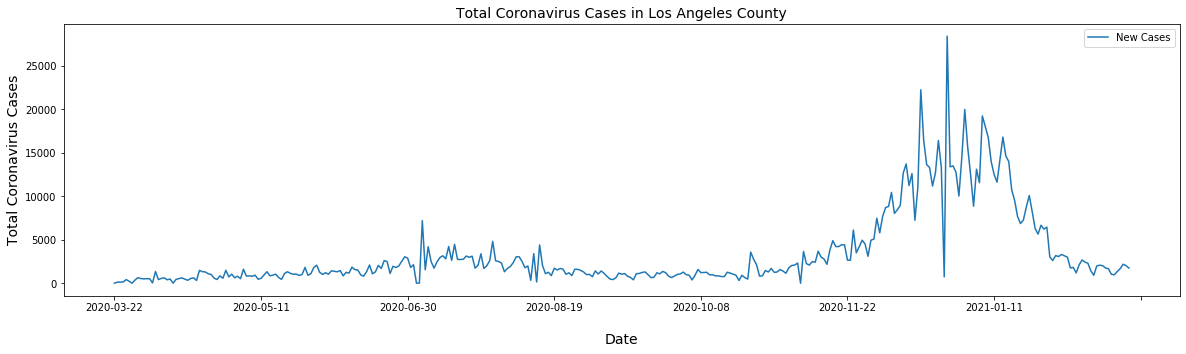

In [35]:
# Plot the number of cases for LA County
la_county_df = covid_county_df.loc['California'][['County','New Cases','Date']]
mask1 = la_county_df['County']=='Los Angeles'
la_county_df=la_county_df[mask1]
la_county_df.sort_values(by='Date', inplace=True)

la_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total Coronavirus Cases in Los Angeles County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total Coronavirus Cases", fontsize=14)

In [36]:
# new_cases_df = la_county_df.sort_values(by='Date', ascending=False).head(1)
# new_cases = new_cases_df.loc['California']['New Cases']
# date = new_cases_df.loc['California']['Date']
# tot_cases = california_cases_by_county_df.loc['Los Angeles']['Total Cases']
# print(f'There were {new_cases:,} new cases reported for a total of {tot_cases:,} cases on {date} in LA County, CA.')

### Seven Day Average of New Cases and New Deaths in Los Angeles County, CA

In [37]:
la_avg_df = covid_county_df.loc['California']
map_county = la_avg_df['County'] == 'Los Angeles'
la_avg_df = la_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
lac_date = la_avg_df['Date'].max()

la_avg_df = la_avg_df[['New Cases', 'New Deaths']].mean()
la_avg_df = pd.DataFrame(la_avg_df)

la_new_cases_avg = round(la_avg_df.loc['New Cases'][0],0)
la_new_deaths_avg = round(la_avg_df.loc['New Deaths'][0],0)

print(f'7 Day Average as of: {lac_date}\n')
print(f'The 7 day daily average of New Cases in Los Angeles County, CA: {la_new_cases_avg:,}')
print(f'The 7 day daily average of New Deaths in Los Angeles County, CA: {la_new_deaths_avg:,}')

7 Day Average as of: 2021-03-06

The 7 day daily average of New Cases in Los Angeles County, CA: 1,567.0
The 7 day daily average of New Deaths in Los Angeles County, CA: 97.0


### Total Coronavirus cases in Indiana

In [38]:
ind_plots_df=state_plots_df[['State', 'Total Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Cases')

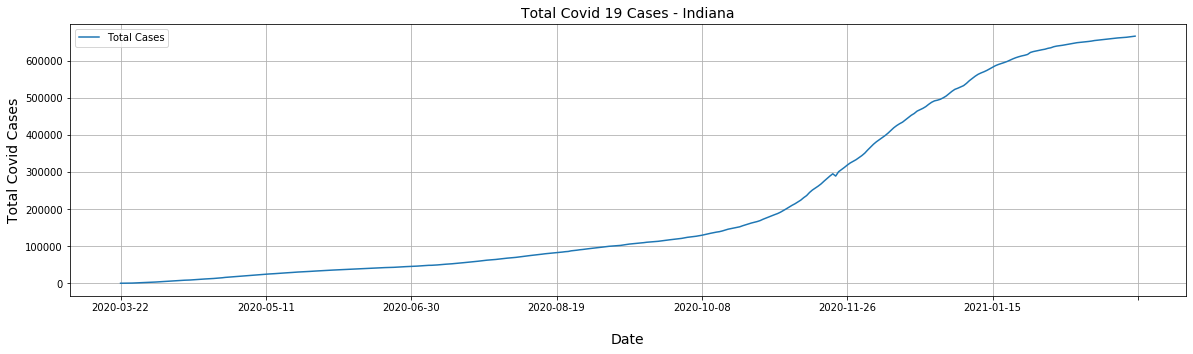

In [39]:
ind_plots_df.plot.line( y='Total Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Cases', fontsize=14)

In [40]:
tot_cases_today = last_state_date_df.loc['Indiana']['Total Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus cases reported as of {date}: {tot_cases_today:,}')

Total number of coronavirus cases reported as of 2021-03-06: 666,516


### Plot New Coronavirus cases in Indiana

In [41]:
ind_plots_df=state_plots_df[['State', 'New Cases']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Cases')

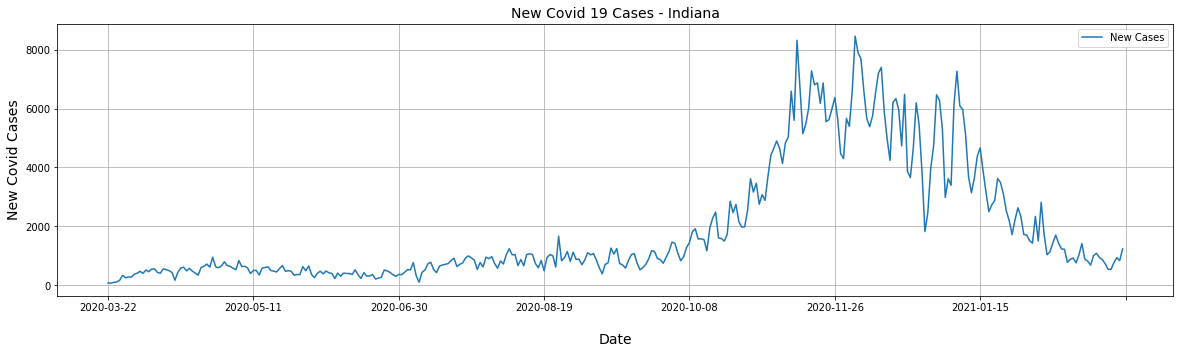

In [42]:
ind_plots_df.plot.line( y='New Cases', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Cases - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Cases', fontsize=14)

In [43]:
new_cases_today = last_state_date_df.loc['Indiana']['New Cases']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus cases reported on {date}: {new_cases_today:,}')

Total number of new coronavirus cases reported on 2021-03-06: 1,231


### Plot Total Coronavirus Deaths in Indiana

In [44]:
ind_plots_df=state_plots_df[['State', 'Total Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'Total Covid Deaths')

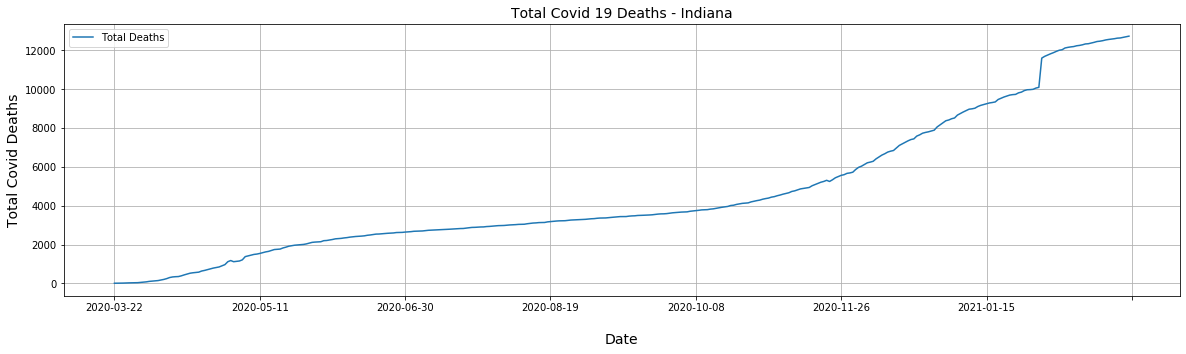

In [45]:
ind_plots_df.plot.line( y='Total Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("Total Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('Total Covid Deaths', fontsize=14)

In [46]:
tot_deaths = last_state_date_df.loc['Indiana']['Total Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of coronavirus deaths as of {date}: {tot_deaths:,}')

Total number of coronavirus deaths as of 2021-03-06: 12,726


### Plot New Coronavirus Deaths in Indiana

In [47]:
ind_plots_df=state_plots_df[['State', 'New Deaths']]
mask1 = ind_plots_df['State'] == 'Indiana'

ind_plots_df = ind_plots_df[mask1]

Text(0, 0.5, 'New Covid Deaths')

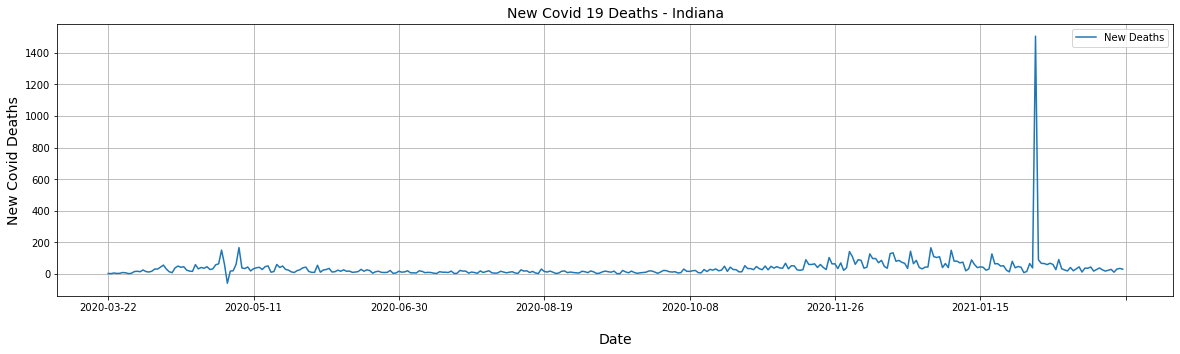

In [48]:
ind_plots_df.plot.line( y='New Deaths', figsize=(20,5), grid=True)

# Label plot
plt.title("New Covid 19 Deaths - Indiana", fontsize=14)
plt.xlabel('\nDate', fontsize=14)
plt.ylabel('New Covid Deaths', fontsize=14)

In [49]:
new_deaths = last_state_date_df.loc['Indiana']['New Deaths']
date = last_state_date_df.loc['Indiana']['Date']
print(f'Total number of new coronavirus deaths reported on {date}: {new_deaths:,}')

Total number of new coronavirus deaths reported on 2021-03-06: 29


### Seven Day Average of New Cases and New Deaths in Indiana

In [50]:
my_idx = covid_state_df.index.name
avg_sev_in_df = covid_state_df.sort_values(by=[my_idx, 'Date'], ascending = [True, False])
avg_seven_in_df = avg_sev_in_df.loc['Indiana'].head(7)
in_date = avg_seven_in_df['Date'].max()

avg_seven_in_df = avg_seven_in_df[['New Cases', 'New Deaths']].mean()
avg_seven_in_df = pd.DataFrame(avg_seven_in_df)
# avg_seven_ca_df

new_cases_avg = round(avg_seven_in_df.loc['New Cases'][0],0)
new_deaths_avg = round(avg_seven_in_df.loc['New Deaths'][0],0)
print(f'7 day avg as of: {in_date}\n')
print(f'The 7 day daily average of New Cases in IN is {new_cases_avg:,}')
print(f'The 7 day daily average of New Deaths in IN is {new_deaths_avg:,}')

7 day avg as of: 2021-03-06

The 7 day daily average of New Cases in IN is 796.0
The 7 day daily average of New Deaths in IN is 24.0


### Coronavirus in Fulton County, IN

In [51]:
# Show the total coronavirus cases by county in Indiana
# indiana_cases_by_county_df = covid_county_last_df.loc['Indiana']
# indiana_cases_by_county_df

### Plot Total Coronavirus Cases in Fulton County, IN

Text(0, 0.5, 'Total New Coronavirus Cases')

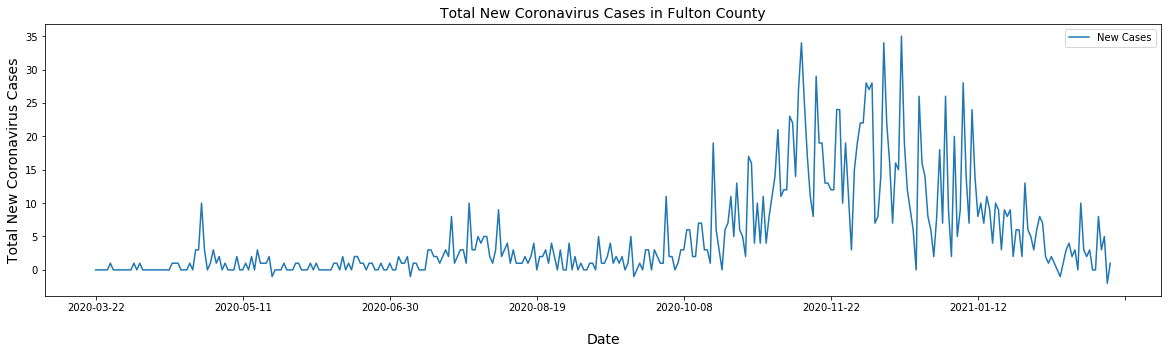

In [52]:
# Plot the number of cases for Fulton County
fulton_county_df = covid_county_df.loc['Indiana'][['County','New Cases','Date']]
mask1 = fulton_county_df['County']=='Fulton'
fulton_county_df=fulton_county_df[mask1]
fulton_county_df.sort_values(by='Date', inplace=True)

fulton_county_df.plot(kind='line', x='Date', y='New Cases', figsize=(20,5))
plt.title("Total New Coronavirus Cases in Fulton County", fontsize=14)
plt.xlabel("\nDate", fontsize=14)
plt.ylabel("Total New Coronavirus Cases", fontsize=14)

In [53]:
# new_cases_df = fulton_county_df.sort_values(by='Date', ascending=False).head(1)
# new_cases = new_cases_df.loc['Indiana']['New Cases']
# date = new_cases_df.loc['Indiana']['Date']
# tot_cases = indiana_cases_by_county_df.loc['Fulton']['Total Cases']
# print(f'There were {new_cases:,} new cases reported for a total of {tot_cases} cases on {date} in Fulton County, IN.')

### Seven Day Average of New Cases and New Deaths in Fulton County, IN

In [54]:
fc_avg_df = covid_county_df.loc['Indiana']
map_county = fc_avg_df['County'] == 'Fulton'
fc_avg_df = fc_avg_df[map_county].reset_index().set_index('County').sort_values(by='Date', ascending=False).head(7)
fc_date = fc_avg_df['Date'].max()

fc_avg_df = fc_avg_df[['New Cases', 'New Deaths']].mean()
fc_avg_df = pd.DataFrame(fc_avg_df)

fc_new_cases_avg = round(fc_avg_df.loc['New Cases'][0],0)
fc_new_deaths_avg = round(fc_avg_df.loc['New Deaths'][0],2)
print(f'7 day average as of: {fc_date}\n')
print(f'The 7 day daily average of New Cases in Fulton County, IN is {fc_new_cases_avg:,}')
print(f'The 7 day daily average of New Deaths in Fulton County, IN is {fc_new_deaths_avg:,}')

7 day average as of: 2021-03-06

The 7 day daily average of New Cases in Fulton County, IN is 2.0
The 7 day daily average of New Deaths in Fulton County, IN is 0.0


### New Covid Case Data for Santa Clarita Valley, CA

In [55]:
scv_data_path=('Resources/Covid_19_Santa_Clarita_Valley.xlsx')
scv_covid_df = pd.read_excel(scv_data_path)
scv_covid_df.set_index('Date', inplace = True)

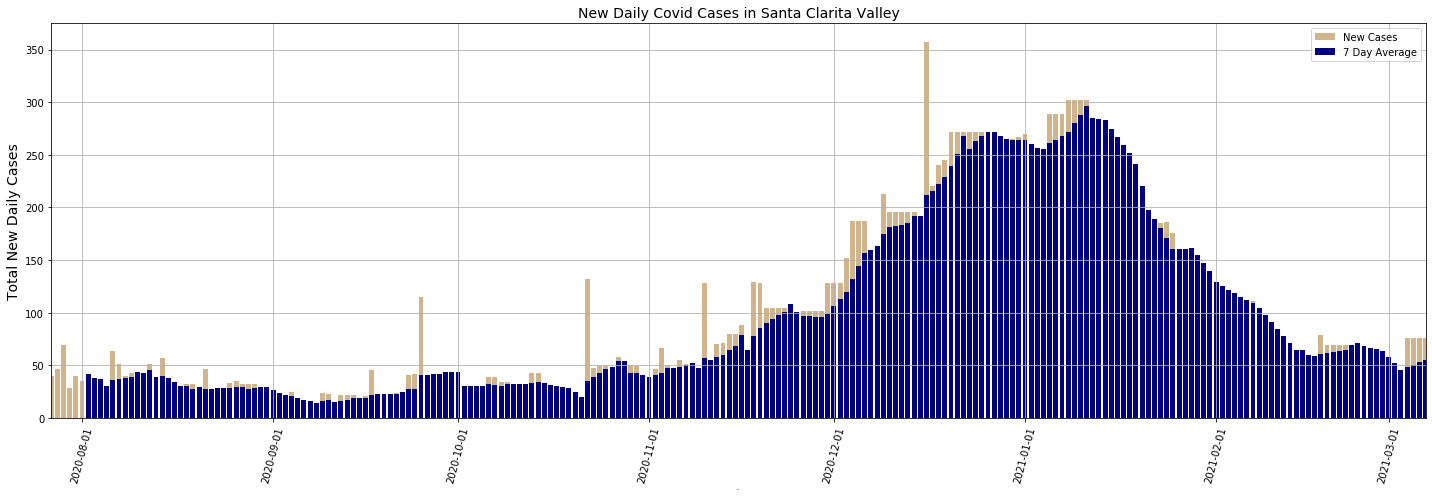

In [56]:
# import the Santa Clarita data into a line chart

# Plot the new cases SCV as a bar chart
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(scv_covid_df.index.values, scv_covid_df['New Cases'], color='tan')
ax.bar(scv_covid_df.index.values, scv_covid_df['7 Day Average'], color='navy')
min_date = scv_covid_df.index.min()
max_date = scv_covid_df.index.max()
ax.set_xlim([min_date,max_date])
ax.legend(['New Cases', '7 Day Average'], loc='best')
ax.grid(True)

# Set the x axis labels to show every 6th day
ax.set_xticks(ax.get_xticks()[::1])
plt.xticks(rotation=75)

# ax.set_xticklabels('date_list')

plt.title('New Daily Covid Cases in Santa Clarita Valley', fontsize=14)
plt.xlabel('Date', fontsize=1)
plt.ylabel('Total New Daily Cases', fontsize=14)
plt.tight_layout()

In [57]:
scv_covid_df = scv_covid_df.sort_index(ascending=False)
scv_covid_avg_df = scv_covid_df.head(7)
date_val = scv_covid_df.index.max().date()
date_val = (f'{date_val.year}-{date_val.month}-{date_val.day}')

tot_cases = scv_covid_avg_df.loc[date_val]['Total Cases'][0]
new_cases = scv_covid_avg_df.loc[date_val]['New Cases'][0]
avg_cases = round(scv_covid_avg_df['New Cases'].mean(),0)

print(f'Covid data in Santa Clarita Valley as of: {date_val}:\n')
print(f'Total covid cases in Santa Clarita Valley: {tot_cases}')
print(f'New covid cases in Santa Clarita Valley: {new_cases}')
print(f'Seven day average of daily new covid cases in Santa Clarita Valley: {avg_cases}')

Covid data in Santa Clarita Valley as of: 2021-3-7:

Total covid cases in Santa Clarita Valley: 25714.0
New covid cases in Santa Clarita Valley: 75.75
Seven day average of daily new covid cases in Santa Clarita Valley: 55.0
